<a href="https://colab.research.google.com/github/lorenzdes/Wikipedia_knowledge_graph/blob/main/Wikipedia_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wikipedia dataset containing cleaned articles of all languages. The datasets are built from the Wikipedia dump (https://dumps.wikimedia.org/) with one split per language. Each example contains the content of one full Wikipedia article with cleaning to strip markdown and unwanted sections (references, etc.).

The articles are parsed using the mwparserfromhell tool.

In [1]:
pip install apache_beam mwparserfromhell


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 23.8 MB/s 
     |████████████████████████████████| 176 kB 37.2 MB/s 
     |████████████████████████████████| 2.4 MB 67.2 MB/s 
     |████████████████████████████████| 151 kB 64.9 MB/s 
     |████████████████████████████████| 270 kB 58.9 MB/s 
     |████████████████████████████████| 508 kB 47.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 47 kB 5.3 MB/s 
     |████████████████████████████████| 1.0 MB 49.4 MB/s 
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=032b2b14b15f6035f6dc6a280b96431ff4a0ea7c3b86b4e7505aff546e40d834
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=fdd38a06ca1af241aafba9bc8f42bd426c2940

In [2]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 432 kB 19.0 MB/s 
     |████████████████████████████████| 163 kB 72.3 MB/s 
     |████████████████████████████████| 115 kB 54.6 MB/s 
     |████████████████████████████████| 212 kB 64.2 MB/s 
     |████████████████████████████████| 140 kB 54.6 MB/s 
     |████████████████████████████████| 95 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.1.1
    Uninstalling dill-0.3.1.1:
      Successfully uninstalled dill-0.3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.41.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3

In [3]:
from datasets import load_dataset

data = load_dataset("wikipedia", "20220301.en", split = 'train')

Downloading:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/20.3G [00:00<?, ?B/s]

Dataset wikipedia downloaded and prepared to /root/.cache/huggingface/datasets/wikipedia/20220301.en/2.0.0/aa542ed919df55cc5d3347f42dd4521d05ca68751f50dbc32bae2a7f1e167559. Subsequent calls will reuse this data.


In [4]:
print(data)

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 6458670
})


In [5]:
type(data)

datasets.arrow_dataset.Dataset

In [6]:
data[3]

{'id': '290',
 'url': 'https://en.wikipedia.org/wiki/A',
 'title': 'A',
 'text': 'A, or a, is the first letter and the first vowel of the modern English alphabet and the ISO basic Latin alphabet. Its name in English is a (pronounced ), plural aes. It is similar in shape to the Ancient Greek letter alpha, from which it derives. The uppercase version consists of the two slanting sides of a triangle, crossed in the middle by a horizontal bar. The lowercase version can be written in two forms: the double-storey a and single-storey ɑ. The latter is commonly used in handwriting and fonts based on it, especially fonts intended to be read by children, and is also found in italic type.\n\nIn the English grammar, "a", and its variant "an", are indefinite articles.\n\nHistory\n\nThe earliest certain ancestor of "A" is aleph (also written \'aleph), the first letter of the Phoenician alphabet, which consisted entirely of consonants (for that reason, it is also called an abjad to distinguish it from

A Knowledge Graph is a set of data points connected by relations that describe a domain, for instance, a business, an organization, or a field of study. It is a powerful way of representing data because Knowledge Graphs can be built automatically and can then be explored to reveal new insights about the domain.

The concept of Knowledge Graphs borrows from the Graph Theory. Entity 1 and Entity 2 are called nodes and the Relationship is called an edge. Of course, in a real-world knowledge graph, there are lots of entities and relationships and there is more than one way to arrive at one entity starting from another.

Usually, these types of graphs is modeled with triples, which are sets of three items like (subject, verb, object), with the verb being the relationship between the subject and the object - for example (London, is_capital, England).

In [7]:
import pandas as pd
sample = data[3]
print(sample)
variable_names = ["id", "text"]

out = {item: sample.get(item) for item in variable_names}
print(out)

{'id': '290', 'url': 'https://en.wikipedia.org/wiki/A', 'title': 'A', 'text': 'A, or a, is the first letter and the first vowel of the modern English alphabet and the ISO basic Latin alphabet. Its name in English is a (pronounced ), plural aes. It is similar in shape to the Ancient Greek letter alpha, from which it derives. The uppercase version consists of the two slanting sides of a triangle, crossed in the middle by a horizontal bar. The lowercase version can be written in two forms: the double-storey a and single-storey ɑ. The latter is commonly used in handwriting and fonts based on it, especially fonts intended to be read by children, and is also found in italic type.\n\nIn the English grammar, "a", and its variant "an", are indefinite articles.\n\nHistory\n\nThe earliest certain ancestor of "A" is aleph (also written \'aleph), the first letter of the Phoenician alphabet, which consisted entirely of consonants (for that reason, it is also called an abjad to distinguish it from a 

In [8]:
datatable = pd.DataFrame(out.items(), columns=['id', 'text'])
datatable.head()

,id,text
0,id,290
1,text,"A, or a, is the first letter and the first vow..."


In [9]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Retriving a sample from the full dataset. It is iterable, thus next chunks could be generalized to the whole dataset.

In [11]:
text = datatable['text'][1]
print(text)

A, or a, is the first letter and the first vowel of the modern English alphabet and the ISO basic Latin alphabet. Its name in English is a (pronounced ), plural aes. It is similar in shape to the Ancient Greek letter alpha, from which it derives. The uppercase version consists of the two slanting sides of a triangle, crossed in the middle by a horizontal bar. The lowercase version can be written in two forms: the double-storey a and single-storey ɑ. The latter is commonly used in handwriting and fonts based on it, especially fonts intended to be read by children, and is also found in italic type.

In the English grammar, "a", and its variant "an", are indefinite articles.

History

The earliest certain ancestor of "A" is aleph (also written 'aleph), the first letter of the Phoenician alphabet, which consisted entirely of consonants (for that reason, it is also called an abjad to distinguish it from a true alphabet). In turn, the ancestor of aleph may have been a pictogram of an ox head

# Applying natural language processing techniques to the data so to get sentences and tokenized text

In [12]:
sentences = nltk.tokenize.sent_tokenize(text)
sentences

['A, or a, is the first letter and the first vowel of the modern English alphabet and the ISO basic Latin alphabet.',
 'Its name in English is a (pronounced ), plural aes.',
 'It is similar in shape to the Ancient Greek letter alpha, from which it derives.',
 'The uppercase version consists of the two slanting sides of a triangle, crossed in the middle by a horizontal bar.',
 'The lowercase version can be written in two forms: the double-storey a and single-storey ɑ.',
 'The latter is commonly used in handwriting and fonts based on it, especially fonts intended to be read by children, and is also found in italic type.',
 'In the English grammar, "a", and its variant "an", are indefinite articles.',
 'History\n\nThe earliest certain ancestor of "A" is aleph (also written \'aleph), the first letter of the Phoenician alphabet, which consisted entirely of consonants (for that reason, it is also called an abjad to distinguish it from a true alphabet).',
 'In turn, the ancestor of aleph may 

In [13]:
type(sentences), len(sentences)

(list, 55)

In [14]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Text is arranged in a list of sentences. 

In [19]:
for i in sentences:
  i = nlp(i)

print(sentences)


['A, or a, is the first letter and the first vowel of the modern English alphabet and the ISO basic Latin alphabet.', 'Its name in English is a (pronounced ), plural aes.', 'It is similar in shape to the Ancient Greek letter alpha, from which it derives.', 'The uppercase version consists of the two slanting sides of a triangle, crossed in the middle by a horizontal bar.', 'The lowercase version can be written in two forms: the double-storey a and single-storey ɑ.', 'The latter is commonly used in handwriting and fonts based on it, especially fonts intended to be read by children, and is also found in italic type.', 'In the English grammar, "a", and its variant "an", are indefinite articles.', 'History\n\nThe earliest certain ancestor of "A" is aleph (also written \'aleph), the first letter of the Phoenician alphabet, which consisted entirely of consonants (for that reason, it is also called an abjad to distinguish it from a true alphabet).', 'In turn, the ancestor of aleph may have bee

In [27]:
for sentence in sentences:
  for tok in nlp(sentence):
    print(tok.text, "...", tok.dep_)

# text:	Verbatim text content.
# tag:	Fine-grained part-of-speech.
# dep_:	Syntactic dependency relation.

A ... nsubj
, ... punct
or ... cc
a ... conj
, ... punct
is ... ROOT
the ... det
first ... amod
letter ... attr
and ... cc
the ... det
first ... amod
vowel ... conj
of ... prep
the ... det
modern ... amod
English ... amod
alphabet ... pobj
and ... cc
the ... det
ISO ... nmod
basic ... amod
Latin ... amod
alphabet ... conj
. ... punct
Its ... poss
name ... nsubj
in ... prep
English ... pobj
is ... ROOT
a ... det
( ... punct
pronounced ... amod
) ... punct
, ... punct
plural ... amod
aes ... attr
. ... punct
It ... nsubj
is ... ROOT
similar ... acomp
in ... prep
shape ... pobj
to ... prep
the ... det
Ancient ... compound
Greek ... compound
letter ... compound
alpha ... pobj
, ... punct
from ... prep
which ... pobj
it ... nsubj
derives ... relcl
. ... punct
The ... det
uppercase ... amod
version ... nsubj
consists ... ROOT
of ... prep
the ... det
two ... nummod
slanting ... amod
sides ... pobj
of ... prep
a ... det
triangle ... pobj
, ... punct
crossed ... acl
in ... prep
the ... det
midd

# Entity Pairs Extraction
To build a knowledge graph, the most important things are the nodes and the edges between them.

In [28]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5  
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]

In [29]:
sentence = sentences[1]

'Its name in English is a (pronounced ), plural aes.'

In [30]:
get_entities(sentence)

['Computing codes', 'Latin Vowel letters']

In [32]:
from tqdm import tqdm
entity_pairs = []

for i in tqdm(sentences):
    entity_pairs.append(get_entities(i))

100%|██████████| 55/55 [00:00<00:00, 103.92it/s]


In [33]:
entity_pairs[10:20]

[['one cross line', 'one  which'],
 ['Etruscans', 'Greek Italian letter'],
 ['Latin  that', 'many  English'],
 ['Typographic  variants', 'variant  letter'],
 ['which', 'when  stone'],
 ['everyday  which', 'perishable  surfaces'],
 ['', 'such majuscule cursive'],
 ['also  that', 'monumental  styles'],
 ['known  variants', 'semi  uncial'],
 ['several century variants', 'cursive Western Europe']]

# Relation / Predicate Extraction


In [57]:
from spacy.matcher import Matcher 


def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [58]:
get_relation(sentence)

'links'

In [59]:
relations = [get_relation(i) for i in tqdm(sentences)]


100%|██████████| 55/55 [00:00<00:00, 88.18it/s]


In [60]:
entity_pairs[10:20]


[['one cross line', 'one  which'],
 ['Etruscans', 'Greek Italian letter'],
 ['Latin  that', 'many  English'],
 ['Typographic  variants', 'variant  letter'],
 ['which', 'when  stone'],
 ['everyday  which', 'perishable  surfaces'],
 ['', 'such majuscule cursive'],
 ['also  that', 'monumental  styles'],
 ['known  variants', 'semi  uncial'],
 ['several century variants', 'cursive Western Europe']]

In [61]:
pd.Series(relations).value_counts()[:50]

is                   6
used                 5
was                  4
consists of          3
used as              2
used for             2
are                  2
derive from          1
was common           1
made                 1
serif                1
refer to             1
denotes              1
occur in native      1
occurs in many       1
derived from         1
invented             1
In                   1
have                 1
used to denote       1
developed from       1
derived through      1
saw                  1
is similar           1
were                 1
developed through    1
include              1
existed              1
were many            1
adopted              1
brought              1
rests upon           1
been                 1
called               1
are indefinite       1
used in              1
written in           1
links                1
dtype: int64

# Getting knowledge Graph


In [68]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df

,source,target,edge
0,A,English alphabet,is
1,name,English,is
2,Greek letter it,Greek letter which,is similar
3,uppercase version,horizontal bar,consists of
4,lowercase version,two forms,written in
5,especially fonts,italic type,used in
6,English variant,English grammar,are indefinite
7,entirely it,true alphabet,called
8,two horns,triangular head,been
9,so they,similar alpha,used


In [63]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

# It turns out that we have created a graph with all the relations that we had

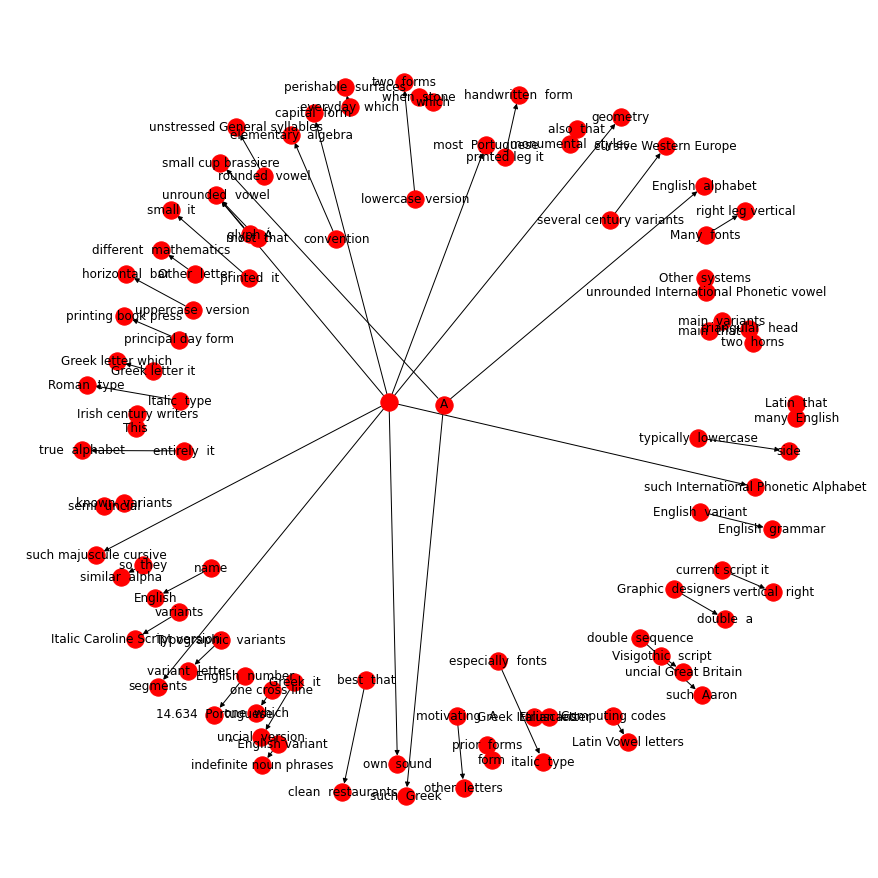

In [64]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()